In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn import model_selection,metrics

from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
import scipy.stats as stats

In [3]:
test_Data=pd.read_csv('Test_dataset.csv')
df_train = pd.read_csv('Train_dataset.csv')

In [4]:
df_train.shape

(3493, 34)

In [5]:
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [6]:
test_Data.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [7]:
target=df_train['Annual Turnover']# target variable removed

train_Regno=df_train['Registration Number']#registration number copied

#df_train.drop('Registration Number',axis=1,inplace=True)
df_train.drop('Annual Turnover',axis=1,inplace=True)

test_Regno=test_Data['Registration Number']#registration number copied test set

#test_Data.drop('Registration Number',axis=1,inplace=True)


In [8]:
test_Data.rename(columns={'Endoresed By': 'Endorsed By'}, inplace=True)


In [9]:
test_Data.shape,df_train.shape

((500, 33), (3493, 33))

In [10]:
data=pd.concat([df_train,test_Data],axis=0)
data.shape

(3993, 33)

In [11]:
data.isna().sum()

Registration Number                 0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         246
Live Music Rating                 867
Comedy Gigs Rating               2853
Value Deals 

#### City

In [12]:
len(data.City.str.upper().unique())

257

In [13]:
data['City'].value_counts().head(20)

Bangalore        627
-1               461
Noida            368
Hyderabad        335
Pune             290
Chennai          272
Gurgaon          198
New Delhi        196
Mumbai           108
Kolkata           98
Jaipur            46
Lucknow           36
Mysore            36
Navi Mumbai       32
chennai           27
Greater Noida     26
pune              26
Chandigarh        26
Indore            24
Bhubaneswar       22
Name: City, dtype: int64

In [14]:
data['City']=data['City'].str.upper()
data['City']=data['City'].str.strip()

In [15]:
data['City'].unique()

array(['BANGALORE', 'INDORE', 'CHENNAI', 'GURGAON', 'MANESAR',
       'HYDERABAD', 'BANGLORE', 'NOIDA', 'KOLKATA', 'PUNE', '-1',
       'MOHALI', 'JHANSI', 'DELHI', 'BHUBANESWAR', 'NAVI MUMBAI',
       'MUMBAI', 'NEW DELHI', 'MANGALORE', 'REWARI', 'GAZIABAAD',
       'BHIWADI', 'MYSORE', 'RAJKOT', 'GREATER NOIDA', 'JAIPUR', 'THANE',
       'MAHARAJGANJ', 'THIRUVANANTHAPURAM', 'PUNCHKULA', 'BHUBANESHWAR',
       'COIMBATORE', 'DHANBAD', 'LUCKNOW', 'TRIVANDRUM', 'GANDHI NAGAR',
       'UNA', 'DAMAN AND DIU', 'GURGOAN', 'VSAKHAPTTNAM', 'NAGPUR',
       'BHAGALPUR', 'NEW DELHI - JAISALMER', 'AHMEDABAD', 'KOCHI/COCHIN',
       'BANKURA', 'BENGALURU', 'KANPUR', 'VIJAYAWADA', 'KOCHI', 'BEAWAR',
       'ALWAR', 'SILIGURI', 'RAIPUR', 'BHOPAL', 'FARIDABAD', 'JODHPUR',
       'UDAIPUR', 'MUZAFFARPUR', 'KOLKATA`', 'BULANDSHAHAR', 'HARIDWAR',
       'RAIGARH', 'VISAKHAPATNAM', 'JABALPUR', 'UNNAO', 'AURANGABAD',
       'BELGAUM', 'DEHRADUN', 'RUDRAPUR', 'JAMSHEDPUR', 'VIZAG', 'NOUDA',
       'DHARAM

In [16]:
data['City'] = data['City'].replace(['BANGLORE'],'BANGALORE')
data['City'] = data['City'].replace(['BANGALORE '],'BANGALORE')
data['City'] = data['City'].replace(['GREATER NOIDA'],'NOIDA')
data['City'] = data['City'].replace(['NAVI MUMBAI'],'MUMBAI')
data['City'] = data['City'].replace(['-1'],'OTHERS')
data['City'] = data['City'].replace(['BHUBANESWAR'],'BHUBANESHWAR')
data['City'] = data['City'].replace(['NEW DELHI'],'DELHI')
data['City'] = data['City'].replace(['LATUR (MAHARASHTRA )'],'MAHARASHTRA')
data['City'] = data['City'].replace(['HYDERABAD(BHADURPALLY)'],'HYDERABAD')
data['City'] = data['City'].replace([ 'SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN'],'RAJASTHAN')
data['City'] = data['City'].replace(['KOCHI/COCHIN'],'KOCHI')
data['City'] = data['City'].replace(['NEW DELHI - JAISALMER'],'DELHI')
data['City'] = data['City'].replace(['DELHI/NCR'],'DELHI')
data['City'] = data['City'].replace(['NCR'],'DELHI')
data['City'] = data['City'].replace(['CHENNAI, BANGALORE'],'CHENNAI')
data['City'] = data['City'].replace([ 'NOUDA' ],'NOIDA')
data['City'] = data['City'].replace(['ASIFABADBANGLORE' ],'BANGLORE')
data['City'] = data['City'].replace([' BANGALORE' ],'BANGLORE')
data['City'] = data['City'].replace(['PUNR' ],'PUNE')
data['City'] = data['City'].replace(['HDERABAD' ],'HYDERABAD')
data['City'] = data['City'].replace(['BANGLORE ' ],'BANGLORE')
data['City'] = data['City'].replace(['LONDON' ],'OTHERS')
data['City'] = data['City'].replace(['KOLKATA`' ],'KOLKATA')
data['City'] = data['City'].replace([' DELHI' ],'DELHI')
data['City'] = data['City'].replace([ 'KOCHI/COCHIN, CHENNAI AND COIMBATORE' ],'KOCHI')
data['City'] = data['City'].replace(['BENGALURU' ],'BANGLORE')
data['City'] = data['City'].replace(['NAVI MUMBAI , HYDERABAD' ],'MUMBAI')
data['City'] = data['City'].replace(['BANAGLORE' ],'BANGLORE')
data['City'] = data['City'].replace(['GURAGAON' ],'GURGAON')
data['City'] = data['City'].replace([' MUMBAI' ],'MUMBAI')
data['City'] = data['City'].replace(['NEW DEHLI' ],'DELHI')
data['City'] = data['City'].replace(['CHENNAI & MUMBAI' ],'CHENNAI')
data['City'] = data['City'].replace(['INDIRAPURAM, GHAZIABAD' ],'GHAZIABAD')
data['City'] = data['City'].replace(['GURGOAN' ],'GURGAON')
data['City'] = data['City'].replace(['BANAGALORE' ],'BANGLORE')
data['City'] = data['City'].replace(['INDIA' ],'OTHERS')
data['City'] = data['City'].replace(['DUBAI' ],'OTHERS')
data['City'] = data['City'].replace(['BHUBNESHWAR' ],'BHUBANESHWAR')
data['City'] = data['City'].replace(['AUSTRALIA' ],'OTHERS')
data['City'] = data['City'].replace(['BANGALORE' ],'BANGLORE')

In [17]:
df=pd.DataFrame(data['City'].value_counts())
df[df['City']>10].index

Index(['BANGLORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'CHENNAI', 'DELHI',
       'GURGAON', 'MUMBAI', 'KOLKATA', 'JAIPUR', 'LUCKNOW', 'MYSORE',
       'BHUBANESHWAR', 'CHANDIGARH', 'INDORE', 'COIMBATORE', 'AHMEDABAD',
       'BHOPAL', 'FARIDABAD', 'GHAZIABAD', 'KOCHI', 'MOHALI', 'NAGPUR',
       'DEHRADUN', 'MANGALORE'],
      dtype='object')

In [18]:
l=list(df[df['City']>10].index)
print(l)

['BANGLORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'CHENNAI', 'DELHI', 'GURGAON', 'MUMBAI', 'KOLKATA', 'JAIPUR', 'LUCKNOW', 'MYSORE', 'BHUBANESHWAR', 'CHANDIGARH', 'INDORE', 'COIMBATORE', 'AHMEDABAD', 'BHOPAL', 'FARIDABAD', 'GHAZIABAD', 'KOCHI', 'MOHALI', 'NAGPUR', 'DEHRADUN', 'MANGALORE']


In [19]:
k2=[]
k=list(data['City'])
for i in range(len(k)):
    if k[i] in l:
        k2.append(k[i])
    else:
        k2.append('OTHERS')
data['City']=k2
data.City.unique()

array(['BANGLORE', 'INDORE', 'CHENNAI', 'GURGAON', 'OTHERS', 'HYDERABAD',
       'NOIDA', 'KOLKATA', 'PUNE', 'MOHALI', 'DELHI', 'BHUBANESHWAR',
       'MUMBAI', 'MANGALORE', 'MYSORE', 'JAIPUR', 'COIMBATORE', 'LUCKNOW',
       'NAGPUR', 'AHMEDABAD', 'KOCHI', 'BHOPAL', 'FARIDABAD', 'DEHRADUN',
       'CHANDIGARH', 'GHAZIABAD'], dtype=object)

In [20]:
city_dummy=pd.get_dummies(data['City'],drop_first=True)# -----------------------------------------------------------------------------------------------------------IMPORTANT

In [21]:
city_dummy.shape

(3993, 25)

In [22]:
data.drop('City',axis=1,inplace=True)

###### Comedy Gigs Rating Value Deals Rating Live Sports Rating

In [23]:
data.drop(['Comedy Gigs Rating','Value Deals Rating','Live Sports Rating'],axis=1,inplace=True)

###### Cuisine

In [24]:
data['Cuisine']=data['Cuisine'].str.upper()
data['Cuisine']=data['Cuisine'].str.strip()

In [25]:
data['Cuisine'].unique()

array(['INDIAN,IRISH', 'TIBETAN,ITALIAN', 'TURKISH,NIGERIAN',
       'IRISH,BELGIAN', 'TIBETAN,GREEK', 'CHINESE,SALVADORIAN',
       'ALGERIAN,BELGIAN', 'WELSH,THAI', 'PERUVIAN,CUBAN',
       'JAPANESE,THAI', 'BRITISH,JAPANESE', 'NIGERIAN,CAJUN',
       'ALGERIAN,ALGERIAN', 'POLISH,JEWISH', 'CUBAN,BRITISH',
       'ALGERIAN,KOREAN', 'SWEDISH,GREEK', 'TURKISH,SAPNISH',
       'BRITISH,BELGIAN', 'HAWAIIAN,LATVIAN'], dtype=object)

In [26]:
k=data['Cuisine'].str.split(",", n = 1, expand = True)
k

,0,1
0,INDIAN,IRISH
1,INDIAN,IRISH
2,TIBETAN,ITALIAN
3,TURKISH,NIGERIAN
4,IRISH,BELGIAN
...,...,...
495,INDIAN,IRISH
496,TIBETAN,GREEK
497,INDIAN,IRISH
498,TIBETAN,GREEK


In [27]:
t1=list(k[0].unique())
t2=list(k[1].unique())
typ=pd.DataFrame(t1+t2)
typ=list(typ.drop_duplicates()[0])
print(typ)

['INDIAN', 'TIBETAN', 'TURKISH', 'IRISH', 'CHINESE', 'ALGERIAN', 'WELSH', 'PERUVIAN', 'JAPANESE', 'BRITISH', 'NIGERIAN', 'POLISH', 'CUBAN', 'SWEDISH', 'HAWAIIAN', 'ITALIAN', 'BELGIAN', 'GREEK', 'SALVADORIAN', 'THAI', 'CAJUN', 'JEWISH', 'KOREAN', 'SAPNISH', 'LATVIAN']


In [28]:
len(typ)

25

In [29]:
data.shape

(3993, 29)

In [30]:
cusine=pd.DataFrame(np.zeros(3993*25).reshape(3993,25),columns=typ)# IMPORTANT

In [31]:
for i in range(len(k)):
    n1=k[0].iloc[i]
    n2=k[1].iloc[i]
    cusine[n1].iloc[i]=1
    cusine[n2].iloc[i]=1

In [32]:
cusine.head()

,INDIAN,TIBETAN,TURKISH,IRISH,CHINESE,ALGERIAN,WELSH,PERUVIAN,JAPANESE,BRITISH,...,ITALIAN,BELGIAN,GREEK,SALVADORIAN,THAI,CAJUN,JEWISH,KOREAN,SAPNISH,LATVIAN
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data.drop('Cuisine',axis=1,inplace=True)

###### Restaurant Location

In [34]:
data['Restaurant Location'].value_counts()

Near Party Hub       3036
Near Business Hub     957
Name: Restaurant Location, dtype: int64

###### Opening day

In [35]:
#converting it into date time
data['Opening Day of Restaurant']=pd.to_datetime(data['Opening Day of Restaurant'])
old=pd.DataFrame(columns=['years_old'])
old['years_old']=2021-data['Opening Day of Restaurant'].dt.year


In [36]:
old['years_old'].value_counts()

11    983
10    838
12    780
13    523
14    310
9     296
15    121
16     59
8      29
17     29
18     13
19      5
7       2
20      2
5       1
21      1
25      1
Name: years_old, dtype: int64

In [37]:
data['Opening Day of Restaurant']=old['years_old']

###### Facebook and Instagram Popularity

Facebook Popularity Quotient     77.887678
Instagram Popularity Quotient    74.448954
dtype: float64 
 Facebook Popularity Quotient     79.00
Instagram Popularity Quotient    74.33
dtype: float64


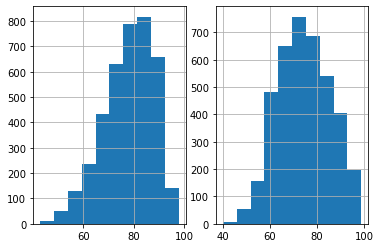

In [38]:
popularity=data[['Facebook Popularity Quotient','Instagram Popularity Quotient']].copy(deep=True)
print(popularity.mean(),'\n',popularity.median())
plt.subplot(1,2,1)
popularity['Facebook Popularity Quotient'].hist()
plt.subplot(1,2,2)
popularity['Instagram Popularity Quotient'].hist()
plt.show()

In [39]:
data['Facebook Popularity Quotient'].fillna(79,inplace=True)
data['Instagram Popularity Quotient'].fillna(74,inplace=True)

In [40]:
data[['Facebook Popularity Quotient','Instagram Popularity Quotient']]=scaler.fit_transform(data[['Facebook Popularity Quotient','Instagram Popularity Quotient']])

###### Endorsed By

In [41]:
data['Endorsed By'].value_counts()

Not Specific        2260
Tier A Celebrity    1696
Local Celebrity       37
Name: Endorsed By, dtype: int64

###### FireAudit

In [42]:
d=pd.DataFrame(data['Fire Audit'])
d['revenue']=target
t1=d[d['Fire Audit']==1]['revenue']
t2=d[d['Fire Audit']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=2.0019614849572145, pvalue=0.04535643001209218)

In [43]:
#data['Fire Audit']=data['Fire Audit'].astype('object')

###### Liquor

In [44]:
d=pd.DataFrame(data['Liquor License Obtained'])
d['revenue']=target
t1=d[d['Liquor License Obtained']==1]['revenue']
t2=d[d['Liquor License Obtained']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.3265861085349437, pvalue=0.18472153426038415)

In [45]:
#data['Liquor License Obtained']=data['Liquor License Obtained'].astype('object')

###### Multiplex

In [46]:
d=pd.DataFrame(data['Situated in a Multi Complex'])
d['revenue']=target
t1=d[d['Situated in a Multi Complex']==1]['revenue']
t2=d[d['Situated in a Multi Complex']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=-3.901150012364405, pvalue=9.731344886120673e-05)

In [47]:
#data['Situated in a Multi Complex']=data['Situated in a Multi Complex'].astype('object')

###### Dedicated Parking

In [48]:
d=pd.DataFrame(data['Dedicated Parking'])
d['revenue']=target
t1=d[d['Dedicated Parking']==1]['revenue']
t2=d[d['Dedicated Parking']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.532017734858553, pvalue=0.12559731707236998)

In [49]:
#data['Dedicated Parking']=data['Dedicated Parking'].astype('object')

###### Open Sitting

In [50]:
d=pd.DataFrame(data['Open Sitting Available'])
d['revenue']=target
t1=d[d['Open Sitting Available']==1]['revenue']
t2=d[d['Open Sitting Available']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=0.7357268457347607, pvalue=0.46194018395470204)

In [51]:
#data['Open Sitting Available']=data['Open Sitting Available'].astype('object')

###### Restaurant city tier

In [52]:
data['Restaurant City Tier'].value_counts()

0    2794
1    1199
Name: Restaurant City Tier, dtype: int64

In [53]:
#data['Restaurant City Tier']=data['Restaurant City Tier'].astype('object')

###### Restaurant Type

In [54]:
data['Restaurant Type'].value_counts()

Bar                         3695
Caffee                       243
Gastro Bar                    53
Buffet/Family Restaurant       2
Name: Restaurant Type, dtype: int64

In [55]:
data['Restaurant Type']=data['Restaurant Type'].astype('object')

###### Restaurant Zomato Rating

In [56]:
data['Restaurant Zomato Rating'].value_counts()

3    1877
2    1416
4     483
1     161
5      43
0      13
Name: Restaurant Zomato Rating, dtype: int64

In [57]:
data['Restaurant Zomato Rating']=data['Restaurant Zomato Rating'].astype('object')

###### Restaurant THeme

In [58]:
data['Restaurant Theme'].value_counts()
# all the names other than arabian ,greek,90s,nature,parsi,chinese will be concidered "others" 

Arabian      1592
Greek        1163
90's          659
Nature        201
Parsi         121
Chinese        82
Molino         29
Delicio        27
English        20
Belise         15
Moonrise       13
Downtown       10
Mise En         9
Carbone         6
TheGem          6
Petit           5
Marco           5
Picante         4
Benedicta       4
Umami           3
Bettaso         2
Savory          2
Ambiance        2
Resca           2
Cafepro         2
LaCuisine       1
Sage            1
Flavors         1
Bakery          1
Spoon           1
Cinnamon        1
Italica         1
Piquant         1
Grand           1
Name: Restaurant Theme, dtype: int64

In [59]:
k=['Arabian','Greek',"90's",'Nature','Parsi','Chinese','Molino','Delicio','English']
l=[]
for i in data['Restaurant Theme']:
    if i not in k:
        l.append('Others')
    else:
        l.append(i)
data['Restaurant Theme']=l


In [60]:
data['Restaurant Theme'].value_counts()


Arabian    1592
Greek      1163
90's        659
Nature      201
Parsi       121
Others       99
Chinese      82
Molino       29
Delicio      27
English      20
Name: Restaurant Theme, dtype: int64

###### Restaurant tier 

In [61]:
data['Resturant Tier'].unique()

array([ 2.,  1., nan])

In [62]:
data['Resturant Tier'].value_counts()

2.0    3657
1.0     287
Name: Resturant Tier, dtype: int64

In [63]:
data[data['Resturant Tier'].isna()==True][['Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier']]

,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier
4,NaN,Bar,Greek,3,0
8,NaN,Bar,Greek,4,1
151,NaN,Bar,Greek,2,0
156,NaN,Bar,Chinese,3,0
163,NaN,Bar,90's,2,0
168,NaN,Bar,Arabian,3,1
176,NaN,Bar,Greek,3,0
184,NaN,Bar,Greek,2,0
195,NaN,Bar,Arabian,3,1
197,NaN,Bar,Chinese,3,0


In [64]:
data['Resturant Tier'].fillna(2.0,inplace=True)
data['Resturant Tier']=data['Resturant Tier'].astype('object')

###### Order Wait Time	|| Staff Responsivness	|| Value for Money	|| Hygiene Rating	|| Food Rating	|| Overall Restaurant Rating	||
  #### Live Music Rating || Ambience

In [65]:
df_train.columns

Index(['Registration Number', 'Cuisine', 'City', 'Restaurant Location',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Endorsed By', 'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating',
       'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')

In [66]:
data[[ 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy']].head()

,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,2,5,5,5,7,10.0,4.0,8.0,8,6,6,6
1,6,6,6,7,8,9.0,NaN,5.0,7,7,3,8
2,2,6,5,3,7,8.0,3.0,7.0,10,5,2,8
3,7,6,5,6,8,9.0,6.0,7.0,7,4,3,5
4,10,5,6,4,8,6.0,NaN,NaN,6,2,4,6


In [67]:
data[[ 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy']].isna().sum()

Order Wait Time                0
Staff Responsivness            0
Value for Money                0
Hygiene Rating                 0
Food Rating                    0
Overall Restaurant Rating    246
Live Music Rating            867
Ambience                      25
Lively                         0
Service                        0
Comfortablility                0
Privacy                        0
dtype: int64

In [68]:
from sklearn.impute import KNNImputer
knn=KNNImputer()


In [69]:
data[[ 'Order Wait Time', 'Staff Responsivness','Value for Money', 'Hygiene Rating', 'Food Rating','Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy']]=knn.fit_transform(data[[ 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 
                                                                                              'Food Rating','Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively','Service', 'Comfortablility', 'Privacy']])

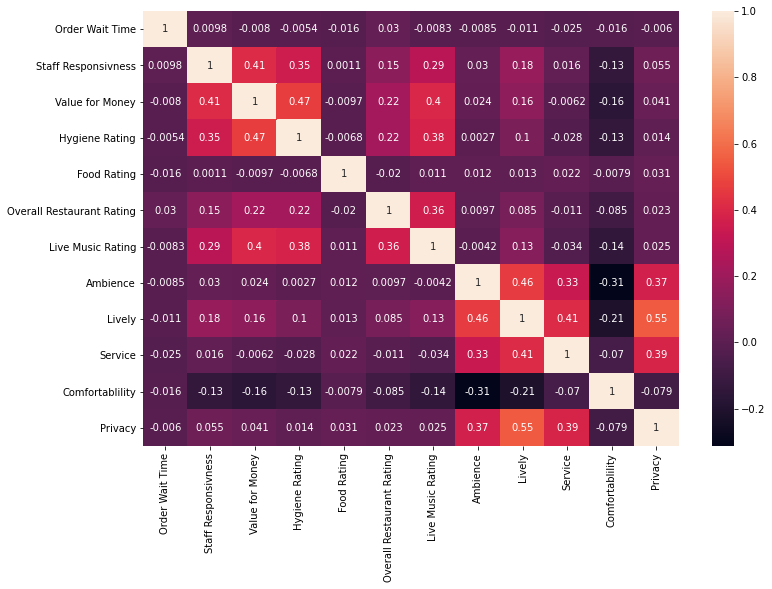

In [70]:
plt.rcParams['figure.figsize']=[12,8]
sns.heatmap(data[[ 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy']].corr(),annot=True)

In [71]:
data[[ 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy']]=data[[ 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy']].astype('object')

In [72]:
data.head()

,Registration Number,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,...,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,Near Business Hub,12,0.655581,Not Specific,1.957223,1,1,1,0,...,5.0,5.0,7.0,10.0,4.0,8.0,8.0,6.0,6.0,6.0
1,60002,Near Party Hub,13,0.768529,Tier A Celebrity,0.967493,1,1,1,1,...,6.0,7.0,8.0,9.0,4.8,5.0,7.0,7.0,3.0,8.0
2,60003,Near Business Hub,10,0.727457,Tier A Celebrity,-0.572088,1,1,1,1,...,5.0,3.0,7.0,8.0,3.0,7.0,10.0,5.0,2.0,8.0
3,60004,Near Party Hub,13,0.789065,Tier A Celebrity,0.839194,0,1,1,1,...,5.0,6.0,8.0,9.0,6.0,7.0,7.0,4.0,3.0,5.0
4,60005,Near Party Hub,11,0.111381,Tier A Celebrity,0.216031,1,1,1,1,...,6.0,4.0,8.0,6.0,3.8,5.4,6.0,2.0,4.0,6.0


In [73]:
data.isna().sum()

Registration Number              0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Ambience                         0
Lively                           0
Service                          0
Comfortablility                  0
Privacy                          0
dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Restaurant Location            3993 non-null   object 
 2   Opening Day of Restaurant      3993 non-null   int64  
 3   Facebook Popularity Quotient   3993 non-null   float64
 4   Endorsed By                    3993 non-null   object 
 5   Instagram Popularity Quotient  3993 non-null   float64
 6   Fire Audit                     3993 non-null   int64  
 7   Liquor License Obtained        3993 non-null   int64  
 8   Situated in a Multi Complex    3993 non-null   int64  
 9   Dedicated Parking              3993 non-null   int64  
 10  Open Sitting Available         3993 non-null   int64  
 11  Resturant Tier                 3993 non-null   object 
 12  Restaurant Type                3993 non-null   ob

In [75]:
data=data.reset_index().drop('index',axis=1).copy(deep=True)

city_dummy=city_dummy.reset_index().drop('index',axis=1).copy(deep=True)
cusine=cusine.reset_index().drop('index',axis=1).copy(deep=True)

In [76]:
data.columns

Index(['Registration Number', 'Restaurant Location',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Endorsed By', 'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')

In [77]:
cat=data.select_dtypes(include='object')
num=data.select_dtypes(include=np.number)
cat_dum=pd.get_dummies(cat,drop_first=True)
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Restaurant Location        3993 non-null   object
 1   Endorsed By                3993 non-null   object
 2   Resturant Tier             3993 non-null   object
 3   Restaurant Type            3993 non-null   object
 4   Restaurant Theme           3993 non-null   object
 5   Restaurant Zomato Rating   3993 non-null   object
 6   Order Wait Time            3993 non-null   object
 7   Staff Responsivness        3993 non-null   object
 8   Value for Money            3993 non-null   object
 9   Hygiene Rating             3993 non-null   object
 10  Food Rating                3993 non-null   object
 11  Overall Restaurant Rating  3993 non-null   object
 12  Live Music Rating          3993 non-null   object
 13  Ambience                   3993 non-null   object
 14  Lively  

In [78]:
cat_dum.shape,num.shape,cusine.shape,city_dummy.shape,data.shape,df_train.shape,test_Data.shape

((3993, 156),
 (3993, 10),
 (3993, 25),
 (3993, 25),
 (3993, 28),
 (3493, 33),
 (500, 33))

In [79]:
new_data=pd.concat([cat_dum,num,cusine,city_dummy],axis=1)
new_data.shape

(3993, 216)

In [80]:
train=new_data.iloc[:3493]
test=new_data.iloc[3493:3993]
train.shape,test.shape

((3493, 216), (500, 216))

In [81]:
y=list(np.log(target))

In [254]:
len(y)

3493

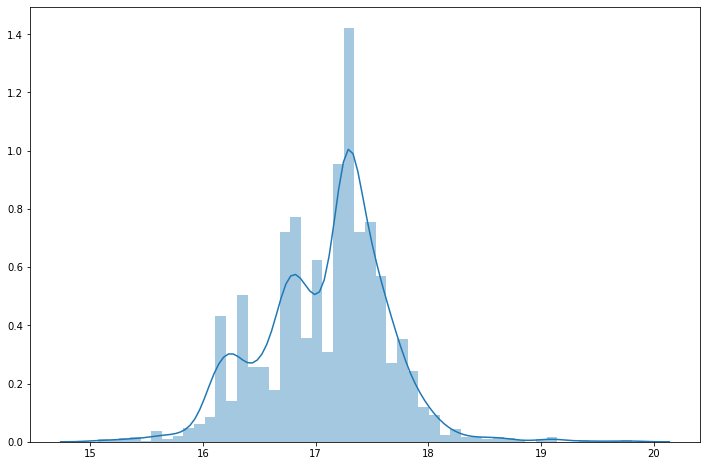

In [82]:
sns.distplot(y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=.2, random_state=42)

In [84]:
lir=LinearRegression()
lir.fit(X_train,y_train)

LinearRegression()

In [94]:
print('train')
pred=lir.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('Test')
pred=lir.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

train
0.43837777559348573
Test
0.4662556541523264


In [138]:
from xgboost import XGBRegressor

In [153]:
xgb=XGBRegressor(objective ='reg:linear',learning_rate=.09,n_jobs=-1)
xgb.fit(X_train,y_train)

pred=xgb.predict(X_train)
print('TRAIN',np.sqrt(metrics.mean_squared_error(y_train,pred)))

pred=xgb.predict(X_test)
print('TEST',np.sqrt(metrics.mean_squared_error(y_test,pred)))

[00:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN 0.32397205930659545
TEST 0.4671120924202572


#### RIDGE LASSO ENet

In [96]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [218]:
R=Ridge(alpha=15.5)
R.fit(X_train,y_train)


print('train')
pred=R.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('Test')
pred=R.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

train
0.4450144558658736
Test
0.45878768299301953


In [187]:
L=Lasso(alpha=.001)
L.fit(X_train,y_train)


print('train')
pred=L.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('Test')
pred=L.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

train
0.4499603992401032
Test
0.4578448597278534


In [223]:
EN=ElasticNet(alpha=0.01,l1_ratio=0.001)
EN.fit(X_train,y_train)

print('train')
pred=EN.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('Test')
pred=EN.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

train
0.4478447735874607
Test
0.45869740783183577


In [135]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=5)

DT.fit(X_train,y_train)

print('train')
pred=DT.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('Test')
pred=DT.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

train
0.48343490759460955
Test
0.5127213690549502


In [168]:
from sklearn.neighbors import KNeighborsRegressor
Knn=KNeighborsRegressor(n_jobs=-1,n_neighbors=40)
Knn.fit(X_train,y_train)

print('train')
pred=Knn.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('Test')
pred=Knn.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

train
0.5423429535949977
Test
0.547316344177516


In [224]:
new_data.shape

(3993, 216)

In [235]:
from sklearn.decomposition import PCA
pca=PCA()
X0=np.array(new_data)
pca.fit(X0)

PCA()

In [238]:
var=pca.explained_variance_ratio_
var=np.cumsum(var)

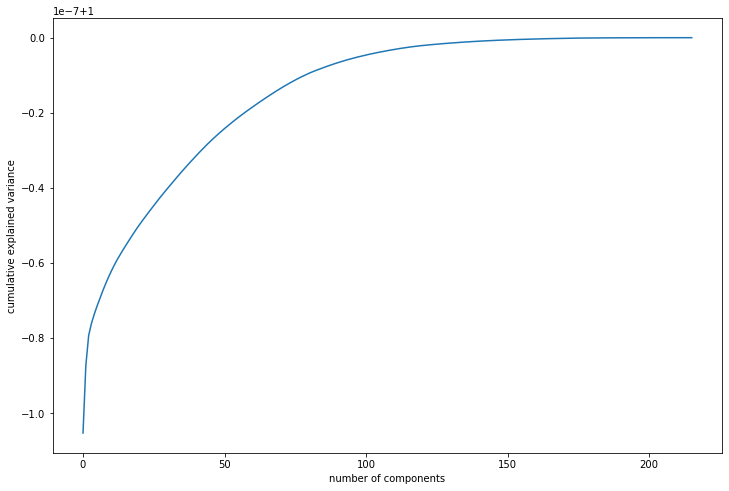

In [241]:
plt.plot(var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [323]:
pca=PCA(n_components=50)
X1=pca.fit_transform(new_data)

In [324]:
train_pca=X1[:][:3493]
test_pca=X1[:][3493:3993]
print(train_pca.shape,test_pca.shape)

pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(train_pca, y, test_size=.2, random_state=42)

(3493, 50) (500, 50)


In [325]:
def algo(model,x_train,x_test,train_y,test_y):
    model.fit(x_train,train_y)
    print('\n------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(model)
    print('train')
    pred=model.predict(x_train)
    print(np.sqrt(metrics.mean_squared_error(train_y,pred)))
    print('Test')
    pred=model.predict(x_test)
    print(np.sqrt(metrics.mean_squared_error(test_y,pred)))

In [326]:
lir=LinearRegression()
algo(lir,pcaX_train, pcaX_test, pcay_train, pcay_test)

DT=DecisionTreeRegressor(max_depth=5)
algo(DT,pcaX_train, pcaX_test, pcay_train, pcay_test)


xgb=XGBRegressor(objective ='reg:linear',learning_rate=.09,n_jobs=-1)
algo(xgb,pcaX_train, pcaX_test, pcay_train, pcay_test)

R=Ridge(alpha=15.5)
algo(R,pcaX_train, pcaX_test, pcay_train, pcay_test)

L=Lasso(alpha=.001)
algo(L,pcaX_train, pcaX_test, pcay_train, pcay_test)

EN=ElasticNet(alpha=0.01,l1_ratio=0.001)
algo(EN,pcaX_train, pcaX_test, pcay_train, pcay_test)



------------------------------------------------------------------------------------------------------------------------------------------------------------------
LinearRegression()
train
0.47945117101947027
Test
0.4782010024084995

------------------------------------------------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_depth=5)
train
0.4685759584385755
Test
0.5231203330664913
[00:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

------------------------------------------------------------------------------------------------------------------------------------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', 

In [354]:
AnnualTurnover=np.exp(L.predict(test_pca))

In [361]:
sub=test_Data[['Registration Number']].copy(deep=True)
sub['AnnualTurnover']=AnnualTurnover

In [362]:
sub.to_csv('submission.csv')